## Remove Corrupted Images

In [1]:
import os
import shutil
import cv2
import numpy as np
from os import listdir
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
input_dir = "../images/01_input_images_1/"
filtered_corrupted_imgs = "../images/02_filter_corrupted_imgs/"

In [3]:
for filename in listdir(input_dir):
    try:
        img = Image.open(input_dir + filename) # open the image file
        img.verify() # verify that it is, in fact an image
        print(filename + " OK")
        shutil.copy(input_dir + filename, filtered_corrupted_imgs + filename) # Copy images to adifferent directory

    except (IOError, SyntaxError) as e:
        print('Bad file:', filename) # print out the names of corrupt files

0000001_05499_d_0000010.jpg OK
0000021_00500_d_0000002.jpg OK
0000021_00500_d_0000010.jpg OK
0000055_00000_d_0000109.jpg OK
0000069_00713_d_0000003.jpg OK
0000069_00713_d_0000030.jpg OK
0000117_00112_d_0000087.jpg OK
0000117_01326_d_0000088.jpg OK
0000117_01731_d_0000089.jpg OK
0000117_02708_d_0000090.jpg OK
0000117_03096_d_0000091.jpg OK
0000117_03096_d_0000099.jpg OK
0000216_00520_d_0000001.jpg OK
0000276_05001_d_0000532.jpg OK
0000280_02201_d_0000623.jpg OK
0000280_02201_d_0000673.jpg OK
0000283_01001_d_0000679.jpg OK
Bad file: 0000313_06401_d_0000188.jpg
0000313_06401_d_0000468.jpg OK
0000313_06401_d_0000470.jpg OK
0000313_06401_d_0000471.jpg OK
0000313_06401_d_0000472.jpg OK
0000313_06401_d_0000473.jpg OK
0000313_06401_d_0000474.jpg OK
0000313_06401_d_0000475.jpg OK
Bad file: 0000313_06401_d_0000488.jpg
0000313_06401_d_0000574.jpg OK


## Remove Dark Images

In [4]:
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = rgb_image.shape[0]* rgb_image.shape[1]
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

In [5]:
filtered_img_list = [f for f in os.listdir(filtered_corrupted_imgs) if os.path.isfile(os.path.join(filtered_corrupted_imgs, f))]

0000021_00500_d_0000010.jpg has average brightnes: 10.773337191358024


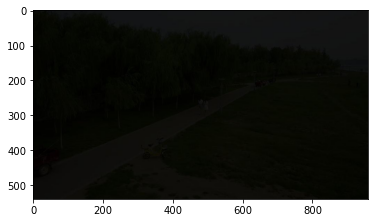

0000117_03096_d_0000099.jpg has average brightnes: 5.129543444828912


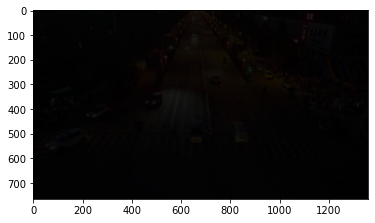

0000280_02201_d_0000673.jpg has average brightnes: 15.06816032295271


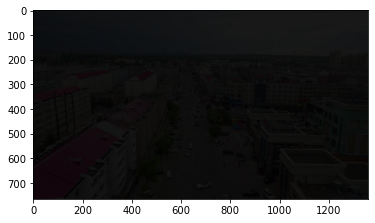

In [6]:
for item in filtered_img_list:
    im = mpimg.imread(filtered_corrupted_imgs + item)
    if avg_brightness(im) < 20:
        print(f"{item} has average brightnes: {avg_brightness(im)}")
        imgplot = plt.imshow(im)
        plt.show()

## Remove Bright Images

0000069_00713_d_0000030.jpg has average brightnes: 254.02808246828144


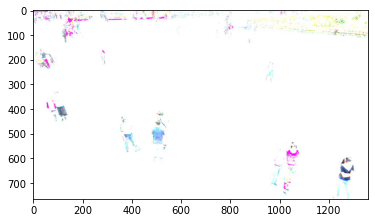

0000313_06401_d_0000574.jpg has average brightnes: 253.515078125


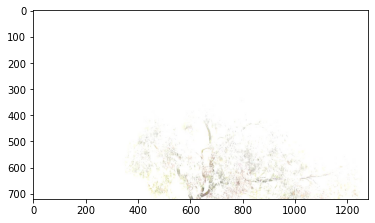

In [7]:
for item in filtered_img_list:
    im = mpimg.imread(filtered_corrupted_imgs + item)
    if avg_brightness(im) > 200:
        print(f"{item} has average brightnes: {avg_brightness(im)}")
        imgplot = plt.imshow(im)
        plt.show()